<a href="https://colab.research.google.com/github/dubuuri/aipython/blob/main/10_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_20240112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

> 데이터의 품질을 높이고 모델의 성능을 향상

* 데이터의 결측값 처리
* 데이터의 이상값 처리
* 데이터의 범위 조정
* 데이터의 변환
* 데이터의 차원 축소



> **데이터 정제**
1. 데이터 수집 과정에서 필요 없는 데이터 제거
2. 손실된 데이터 보정
3. 결측값 채우기
4. 이상값 제거

> **결측값 처리**
1. 결측값 : 비어있거나 누락된 값
2. NA(Not Availabel) : 사용하지 않는 값
3. NaN(Not a Number) : 숫자가 아닌 데이터
4. Null : 아직 정해지지 않는 값으로 빈값

> **이상값 처리**
1. 정상값이 아닌 값
2. 데이터 입력 오류
3. 측정, 실험 오류
4. 의도된 이상값


# 실습 <붓꽃>

> ## 붓꽃 데이터 읽어와서 확인하기

In [46]:
# 붗꽃 데이터 파일 읽어오기

import pandas as pd

iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [47]:
# 데이터의 기본 정보 출력

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
# 데이터의 기초 통계량 출력

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
# 품종별 개수 구하기

iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

> ## 불꽃 데이터 전처리

In [50]:
# 결측치 확인하기

iris.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [51]:
# 컬럼별 결측치 개수 확인하기

iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [42]:
# 중복 데이터 확인하기

iris.duplicated().sum()

1

In [43]:
# 실제 중복 데이터 확인

iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [45]:
# 중복 데이터 모두 확인하기

iris[iris.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [52]:
# 중복 데이터 삭제하기

iris.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


> ## 붗꽃 데이터 그룹핑

In [53]:
# 품종(species) 열을 기준으로 합계 구하기

iris.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [10]:
# 품종(species) 열을 기준으로 평균 구하기

iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


> ## 붓꽃 데이터 시각화

In [9]:
# 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

Text(0, 0.5, '꽃받침의 길이')

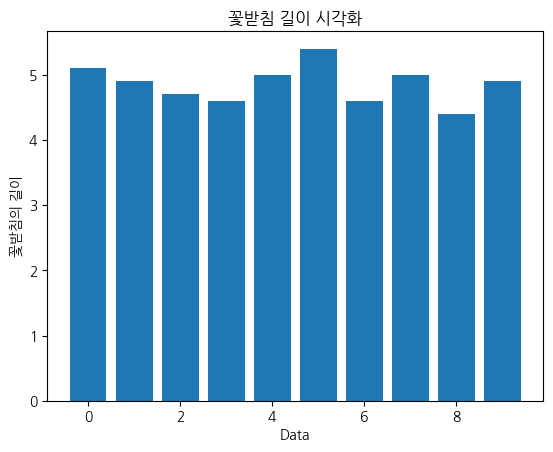

In [37]:
# 막대 그래프 그리기

# 꽃받침 길이의 시각화

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rc('font', family='NanumGothic')

ir = iris.head(10)
plt.bar(ir.index,ir['sepal_length'])
plt.title('꽃받침 길이 시각화')
plt.xlabel('Data')
plt.ylabel('꽃받침의 길이')

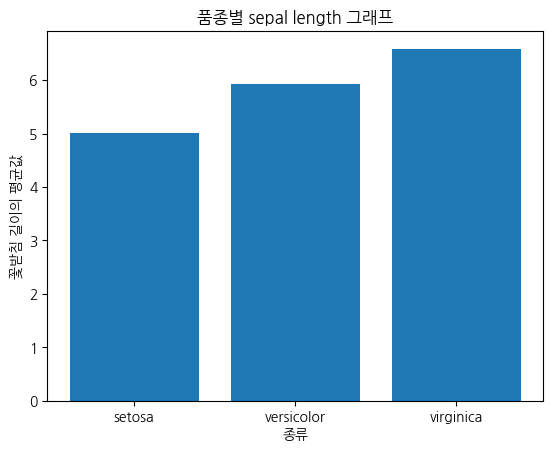

In [59]:
# 막대 그래프 그리기

# 붓꽃 종류별 꽃받침 길이의 평균에 대한 시각화

import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='NanumGothic')
iris = pd.read_csv('iris.csv')
plt.bar(['setosa','versicolor','virginica'],
        iris.groupby('species')['sepal_length'].mean())
plt.title('품종별 sepal length 그래프')
plt.xlabel('종류')
plt.ylabel('꽃받침 길이의 평균값')
plt.show()

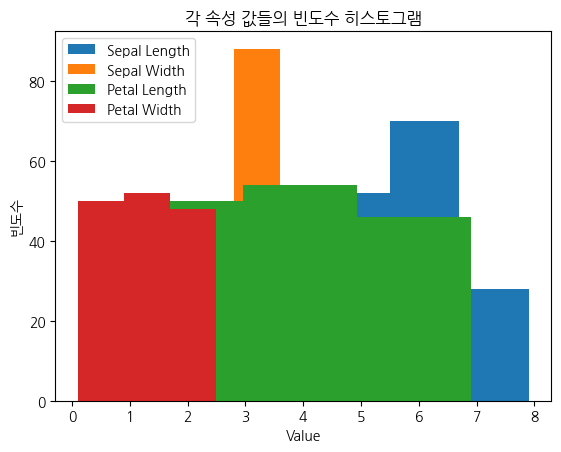

In [41]:
# 히스토그램 그래프 그리기

# 각 특징(4가지) 값들의 빈도수에 대한 시각화

plt.hist(iris['sepal_length'], bins=3, label='Sepal Length')
plt.hist(iris['sepal_width'], bins=3, label='Sepal Width')
plt.hist(iris['petal_length'], bins=3, label='Petal Length')
plt.hist(iris['petal_width'], bins=3, label='Petal Width')
plt.legend()
plt.title('각 속성 값들의 빈도수 히스토그램')
plt.xlabel('Value')
plt.ylabel('빈도수')
plt.show()

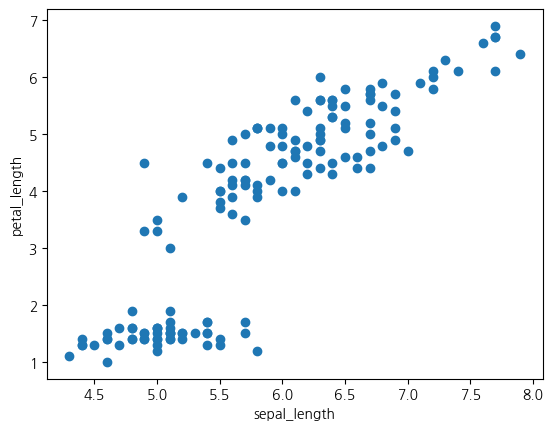

In [33]:
# 산점도 그래프 그리기

# 꽃받침의 길이와 꽃잎의 길이의 산점도를 시각화

plt.scatter(iris['sepal_length'], iris['petal_length'])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

# 실습 <타이타닉>

> ## 타이타닉 데이터 분석

In [54]:
# 데이터 파일 읽어오기

import pandas as pd

t = pd.read_csv('titanic.csv')
t

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [55]:
# 데이터의 기본 정보 출력

t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [56]:
# 데이터의 기초 통계량 출력

t.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
# 요금(fare) 기준 내림차순 정렬

t.sort_values(by=['fare'], ascending=False, inplace=True)
t

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
88,88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
413,413,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
822,822,0,1,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
732,732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [72]:
# 생존자별 인원수 확인

t['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

> ## 타이타닉 데이터 전처리

In [69]:
# 결측치 확인하기

t.isna().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [75]:
# 컬럼 삭제하기

# 결측치가 많은 컬럼 (deck) 삭제

t.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [80]:
# 최빈값 대체하기

# 결측치가 작은 ‘Embarked’ 컬럼에 결측치를 최빈값으로 대체

t.fillna({'embarked':'S'}, inplace=True)
t.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [83]:
# 평균값 대체하기

# 나이의 결측치를 평균 데이터로 대체

t.fillna({'age':t['age'].mean()}, inplace=True)
t.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

> ## 타이타닉 데이터 그룹핑

In [77]:
# 항구(embarked)별 pclass의 평균값 구하기

t.groupby('embarked')['pclass'].mean()

embarked
C    1.886905
Q    2.909091
S    2.350932
Name: pclass, dtype: float64

In [79]:
# pclass, sex 컬럼 기준으로 평균 구하기

t.groupby(['pclass','sex']).mean()

<ipython-input-79-8a977399f727>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t.groupby(['pclass','sex']).mean()


Unnamed: 0  survived        age     sibsp     parch  \
pclass sex                                                           
1      female  468.212766  0.968085  34.611765  0.553191  0.457447   
       male    454.729508  0.368852  41.281386  0.311475  0.278689   
2      female  442.105263  0.921053  28.722973  0.486842  0.605263   
       male    446.962963  0.157407  30.740707  0.342593  0.222222   
3      female  398.729167  0.500000  21.750000  0.895833  0.798611   
       male    454.515850  0.135447  26.507589  0.498559  0.224784   

                     fare  adult_male     alone  
pclass sex                                       
1      female  106.125798    0.000000  0.361702  
       male     67.226127    0.975410  0.614754  
2      female   21.970121    0.000000  0.421053  
       male     19.741782    0.916667  0.666667  
3      female   16.118810    0.000000  0.416667  
       male     12.661633    0.919308  0.760807

> ## 타이타닉 데이터 시각화

Text(0, 0.5, 'count')

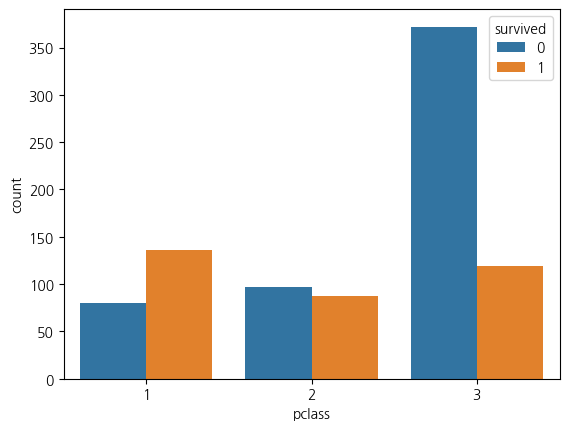

In [67]:
# 막대 그래프 그리기

# 좌석 등급별 생존자 확인 (sns 활용)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

t = pd.read_csv('titanic.csv')

sns.countplot(x='pclass',hue='survived', data=t)
plt.xlabel('pclass')
plt.ylabel('count')

<ipython-input-65-8e01a1c6bcec>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = t.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


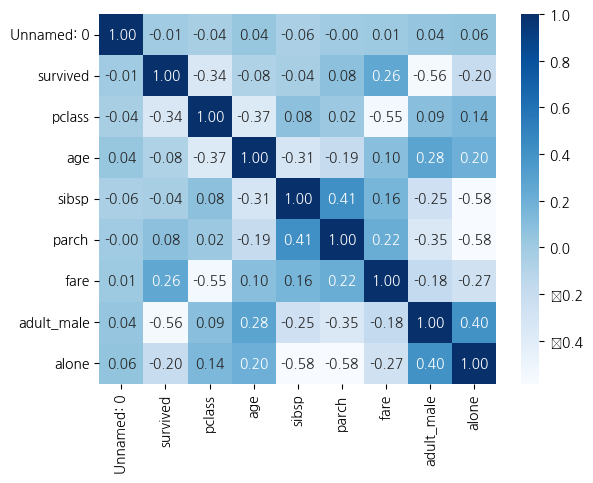

In [65]:
# 히트맵 그래프 그리기

# 푸른색, 숫자 표현 (sns 활용)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

t = pd.read_csv('titanic.csv')

df = t.corr()
sns.heatmap(data=df, annot=True, fmt='.2f', cmap='Blues')
plt.show()